In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
from PostageStampMaker import PostageStampMaker, create_postage_stamps
from Display import render_fits_image
%matplotlib inline

plt.ion()
plt.rcParams['figure.figsize'] = (10, 10)

/Users/Bryce/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/text.py:52: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if rotation in ('horizontal', None):
/Users/Bryce/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/text.py:54: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif rotation == 'vertical':


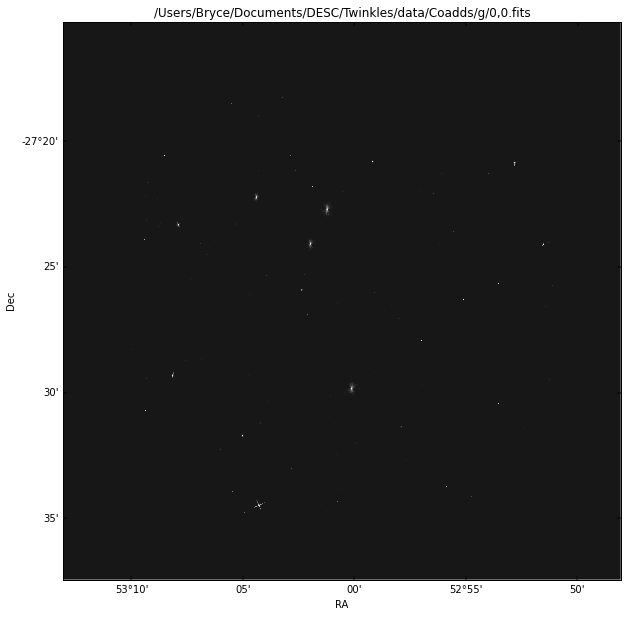

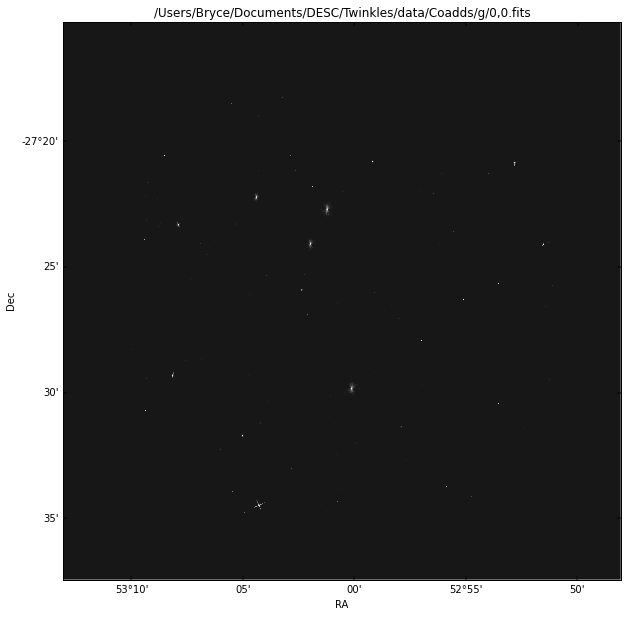

In [7]:
# Display the test image.
exposure_file1 = os.path.join('/Users/Bryce/Documents/DESC/Twinkles/', 'data/Coadds/g', '0,0.fits')
image1 = fits.open(exposure_file1)
render_fits_image(image1[1], title=exposure_file1)

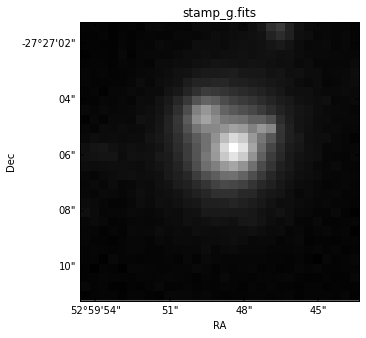

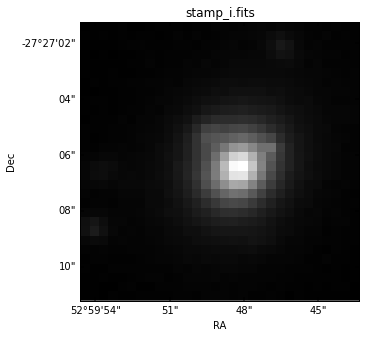

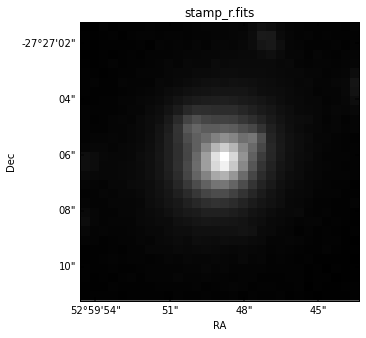

In [15]:
# Create a series of postage stamps from a list of 5 Exposure
# FITS files (using the test image as a proxy for all five) 
# and display each.
plt.rcParams['figure.figsize'] = (5, 5)
dataFolder = '/Users/Bryce/Documents/DESC/Twinkles/data/Coadds/'
expfiles=[]
filterNames = []
for folderName in os.listdir(dataFolder):
    for fileName in os.listdir(str(dataFolder+folderName)):
        expfiles.append(str(dataFolder+folderName+'/'+fileName))
        filterNames.append(folderName)
loc0 = [52.9968499, -27.4517142]
ra = [loc0[0]]
dec = [loc0[1]]
size = 10
for ra_i, dec_i in zip(ra,dec):
    stamps = create_postage_stamps(ra_i, dec_i, size, expfiles)
    for i, stamp in enumerate(stamps):
        outfile = 'stamp_%s.fits' % filterNames[i]
        stamp.writeFits(outfile)
        fits_obj = fits.open(outfile)
        fig = render_fits_image(fits_obj[1], title=outfile)
        plt.savefig('stamp_%i.png' % (i)) 